# 보스턴 집값 예측

## 0 환경 준비

In [2]:
# 필요한 라이브러리(모듈) 임포트

# keras.models라는 라이브러리에서 Sequentiaㅣ()함수를 불러오라는 의미
from keras.models import Sequential
from keras.layers import Dense

# pandas라이브러리를 pd라는 짧은 이름으로 불러오라는 의미
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 데이터 준비

In [4]:
# boston.csv파일을 데이터프레임으로 읽기
# df에 대입

df = pd.read_csv('/content/drive/MyDrive/ChangProgram/data/boston.csv')

In [5]:
# 앞쪽 5개의 데이터 보기

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# 행, 열 확인

df.shape

(506, 14)

In [7]:
# 요약정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


* 독립변수(원인변수)와 종속변수(결과변수) 설정

In [8]:
# 독립변수를 X에 대입

X = df.iloc[:, 0:13]
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [11]:
# 종속변수를 Y에 대입

Y = df.iloc[:, [13]]
Y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## 2 모델구조 만들기

In [12]:
# 레이어를 나란이 연결하기 위해 케라스의 Sequential 모델을 만듦
# model에 대입

model = Sequential()

In [13]:
# 독립변수가 13개, 노드가 30개, 활성화함수='relu'를 설정하여 하나의 Danse레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(30, input_dim=13, activation='relu'))

In [14]:
# 노드가 6개, 활성화함수='relu'를 설정하여 하나의 Danse레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(6, activation='relu'))

In [15]:
# 종속변수 1개를 설정하여 하나의 Dense레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(1))

In [16]:
# 모델 컴파일
# 위에서 만든 모델이 효과적으로 구현될 수 있게 여러가지 옵션을 설정해서 컴파일함
# 손실함수는 최적의 가중치를 학습하기 위해 필수적인 부분
# 손실함수를 평균제곱오차(실제값과 예측값의 차이의 제곱에 제곱근을 구함)로
# 옵티마이저를 'adam'으로 설정하여 모델을 컴파일 함

model.compile(loss='mean_squared_error', optimizer='adam')

## 3 모델 학습시키기

In [18]:
# 독립변수와 종속변수, 학습회수(epochs)를 설정해서 모델을 학습시킴

model.fit(X, Y, epochs=10, verbose=1)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 12.8067
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 12.2604
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 11.7312
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 11.2437
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 10.7529
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 10.8954
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 10.5447
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 11.5659
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 10.7363
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 10.6244


## 4 모델을 이용하여 예측하기

In [19]:
# 학습된 model을 이용하여 예측하기
# X의 10개의 데이터를 주면서 예측해보기

model.predict(X.iloc[:10])

array([[28.004433],
       [23.107775],
       [32.55002 ],
       [35.18677 ],
       [31.71648 ],
       [27.384378],
       [20.967655],
       [19.10732 ],
       [14.641514],
       [18.671434]], dtype=float32)

In [20]:
# Y의 10개의 실제 데이터 확인하기

Y.iloc[:10]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


# 아이리스 품종 분류

## 0 환경 준비

In [ ]:
# 필요한 라이브러리(모듈) 임포트

# keras.models라는 라이브러리에서 Sequentiaㅣ()함수를 불러오라는 의미


# pandas라이브러리를 pd라는 짧은 이름으로 불러오라는 의미


## 1 데이터 준비

In [ ]:
# iris.csv파일을 데이터프레임으로 읽기
# df에 대입



In [ ]:
# 앞쪽 5개의 데이터 보기



,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 행, 열 확인



(150, 5)

In [ ]:
# 요약정보 확인



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃잎길이    150 non-null    float64
 1   꽃잎폭     150 non-null    float64
 2   꽃받침길이   150 non-null    float64
 3   꽃받침폭    150 non-null    float64
 4   품종      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* 원핫인코딩
    - 신경망과 일부 머신 러닝 알고리즘은 숫자만 입력받을 수 있어서 범주형 변수를 바로 사용할 수 없다. 따라서 범주형 변수를 머신 러닝에 사용하려면 반드시 전처리를 거쳐야 한다.
    - <u>범주형 변수를 숫자형 변수로 바꾸는 방법으로 원핫 인코딩(one-hot encoding)을 사용</u>할 수 있다. 
    - <u>판다스는 원핫 인코딩을 get_dummies()메소드</u>로 구현해 제공한다. 예를 들어 N개의 범주 값을 담은 범주형 변수를 원핫 인코딩을 사용해 변환하면, 이진 변수 N개를 얻을 수 있다.

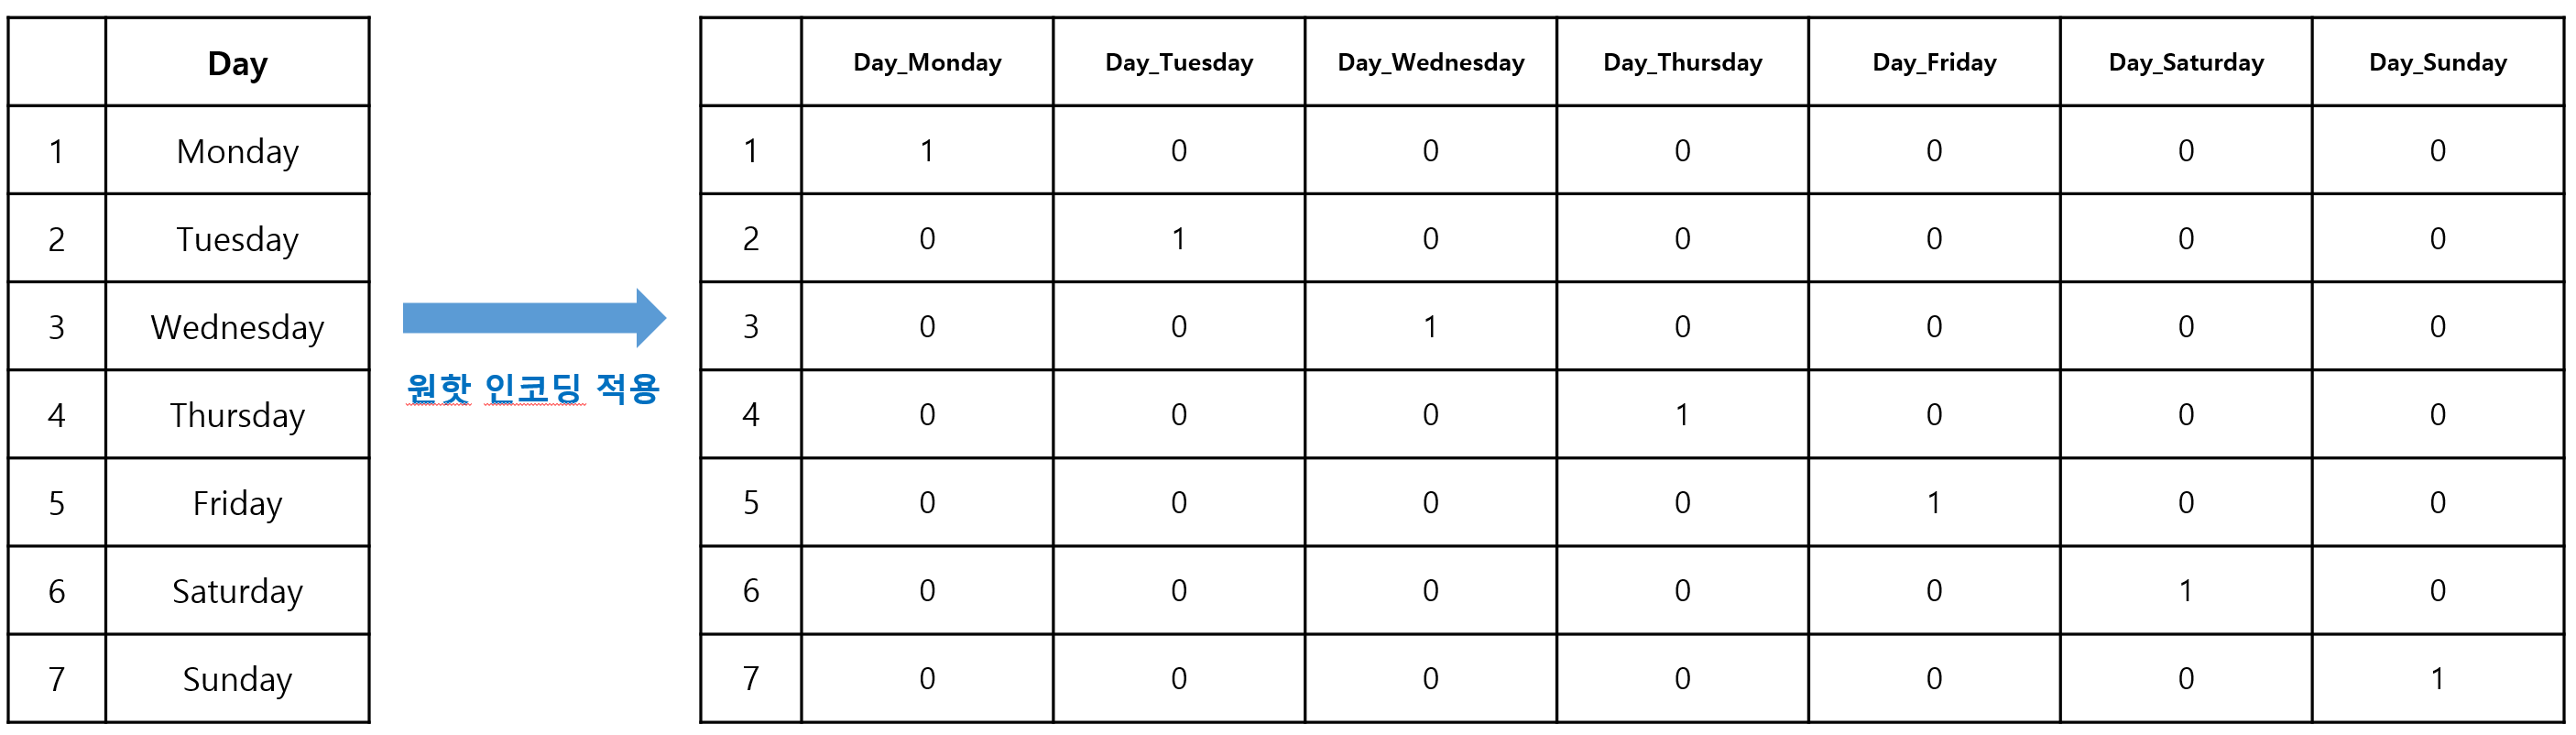

In [ ]:
# 판다스의 get_dummies 메소드를 이용하여 원핫인코딩한다.



,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_setosa,품종_versicolor,품종_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


* 독립변수(원인변수)와 종속변수(결과변수) 설정

In [ ]:
# 독립변수를 X에 대입



,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# 종속변수를 Y에 대입



,품종_setosa,품종_versicolor,품종_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


## 2 모델구조 만들기

In [ ]:
# 레이어를 나란이 연결하기 위해 케라스의 Sequential 모델을 만듦
# model에 대입



In [ ]:
# 독립변수가 4개, 노드가 16개, 활성화함수='relu'를 설정하여 하나의 Danse레이어를 만듦
# 만든 레이어를 model에 추가함



In [ ]:
# 종속변수 3개, 활성화함수='sigmoid'를 설정하여 하나의 Dense레이어를 만듦
# 만든 레이어를 model에 추가함



In [ ]:
# 모델 컴파일
# 위에서 만든 모델이 효과적으로 구현될 수 있게 여러가지 옵션을 설정해서 컴파일함
# 손실함수는 최적의 가중치를 학습하기 위해 필수적인 부분
# 손실함수를 'categorical_crossentropy'로
# 평가지표(metrics)를 'accuricy'로,
# 옵티마이저를 'adam'으로 설정하여 모델을 컴파일 함



## 3 모델 학습시키기

In [ ]:
# 독립변수와 종속변수, 학습회수(epochs)를 설정해서 모델을 학습시킴



Epoch 1/1000
5/5 [==============================] - 0s 3ms/step - loss: 5.5105 - accuracy: 0.3333
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 5.1476 - accuracy: 0.3333
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 4.8162 - accuracy: 0.3333
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 4.4894 - accuracy: 0.3333
Epoch 5/1000
5/5 [==============================] - 0s 3ms/step - loss: 4.2018 - accuracy: 0.3267
Epoch 6/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.9294 - accuracy: 0.3267
Epoch 7/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.6887 - accuracy: 0.3267
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.4665 - accuracy: 0.2867
Epoch 9/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.2665 - accuracy: 0.2600
Epoch 10/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.0623 - accuracy: 0.2400
Epoch 11/1000
5/5 [

## 4 모델을 이용하여 예측하기

In [ ]:
# 학습된 model을 이용하여 예측하기
# X의 10개의 데이터를 주면서 예측해보기



array([[9.9968731e-01, 7.9394668e-01, 5.6213140e-04],
       [9.9889123e-01, 8.5787284e-01, 1.0701716e-03],
       [9.9940044e-01, 7.8990072e-01, 9.5254183e-04],
       [9.9906433e-01, 8.1905866e-01, 1.1478066e-03],
       [9.9970573e-01, 7.8060663e-01, 5.3596497e-04],
       [9.9975824e-01, 7.9789764e-01, 4.2912364e-04],
       [9.9949253e-01, 7.6363337e-01, 9.0107322e-04],
       [9.9955708e-01, 8.1195986e-01, 6.6909194e-04],
       [9.9859869e-01, 8.2091898e-01, 1.5659928e-03],
       [9.9919301e-01, 8.4601188e-01, 8.9094043e-04]], dtype=float32)

In [ ]:
# Y의 10개의 실제 데이터 확인하기



,품종_setosa,품종_versicolor,품종_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0
